# Backpropagation learning for multilayer perceptron

    @author      Donghun Lee
    @rev.date    2017/02/11

Python 2.7 port of Backprop.ipynb Julia code by Prof. Sebastian Seung

- Porting focused to maximize comparable readability of code and results with original Julia code
- Note: In this code, label 0 has index 0. (Python indexing starts from 0, Julia from 1)


In [1]:
import time

from IPython import display

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import sklearn
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original', data_home="data")
def trainfeatures(i):
    return np.float64(mnist.data[i, :])
def trainlabel(i):
    return mnist.target[i]

In [3]:
def f(x):                # logistic function activation (replace to define your own activation function)
    return np.divide(1, (1 + np.exp(-x)))
def df(y):               # derivative of f composed with inverse of f
    return np.multiply(y, 1-y)

m = 60000                # number of examples in training set

n0 = 784                 # widths of layers
n1 = 25
n2 = 10  

eta = 0.1                # learning rate parameter
epsinit = 0.01           # magnitude of initial conditions for synaptic weights

# two fully connected synaptic layers
W1 = epsinit*np.random.randn(n1,n0)
W2 = epsinit*np.random.randn(n2,n1)

# biases
b1 = epsinit*np.random.randn(n1)
b2 = epsinit*np.random.randn(n2)

tmax = 600000            # maximum number of learning updates
tshow = 1000             # how often to pause for visualization
errsq = np.zeros(tmax)
errcl = np.zeros(tmax)

KeyboardInterrupt: 

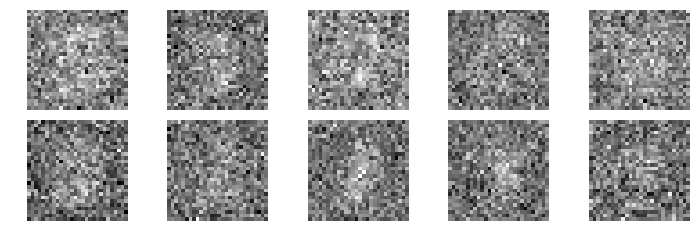

In [4]:
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
fig_size = (12,12)                           # you may need to change the numbers to fit your screen
for t in xrange(tmax):
    i = int(np.ceil(m*np.random.rand()))     # choose randomly from the training set
    x0 = trainfeatures(int(i))/255.0         # (Python 2.x division)
    y = np.zeros(n2)
    y[int(trainlabel(i))] = 1                # use label to create desired output in one-hot representation
                                             # (Python array indexing is from 0)

    # forward pass   
    x1 = f(np.dot(W1,x0)+b1)
    x2 = f(np.dot(W2,x1)+b2)
    # error computation
    errsq[t] = sum(np.power((y-x2), 2))
    delta2 = np.multiply((y-x2),df(x2))
    errcl[t] = float(np.argmax(x2) != trainlabel(i))
    # backward pass
    delta1 = np.multiply(np.dot(W2.T, delta2), df(x1))
    # learning updates
    W2 += eta*np.outer(delta2, x1)
    W1 += eta*np.outer(delta1, x0)
    b2 += eta*delta2
    b1 += eta*delta1

    if t % tshow == 0:    # visualization every tshow steps
        avgerrsq = np.divide( np.cumsum(errsq[0:t]), np.arange(1,t+1) )
        avgerrcl = np.divide( np.cumsum(errcl[0:t]), np.arange(1,t+1) )
        
        fig = plt.figure(figsize=fig_size)
        gs = gridspec.GridSpec(6,5, wspace=0.3, hspace=0.1)

        ax = fig.add_subplot(gs[0,0])
        ax.axis('off')
        ax.set_title("x0 at t={}".format(t))
        ax.imshow(x0.reshape(28,28), origin='upper', interpolation='nearest') 

        ax = fig.add_subplot(gs[0,1])
        ax.bar(range(len(x1)), x1)
        ax.set_ylabel("x1")
        ax.set_ylim([0,1])
        ax.grid()

        ax = fig.add_subplot(gs[0,2])
        ax.bar(range(len(x2)), x2)
        ax.set_ylabel("x2")
        ax.set_ylim([0,1])
        ax.set_xticks(range(0,10))
        ax.grid()

        ax = fig.add_subplot(gs[0,3:5])
        ax.plot(avgerrsq, label="squared")
        ax.plot(avgerrcl, label="class")
        ax.set_ylabel("error")
        ax.set_ylim([0,1])
        ax.grid()
        ax.legend()

        for i in range(n1):
            ax = fig.add_subplot(gs[1 + i / 5, i % 5])
            ax.axis('off')
            ax.imshow(W1.T.reshape(28,28,n1)[:,:,i], origin='upper', interpolation='nearest') 

        display.display(plt.gcf())
        time.sleep(0.01)
        display.clear_output(wait=True)
        fig.clf()
        plt.close(fig)
